# CS331 - Spring 2021 - Phase 3 [5%]

*__Submission Guidelines:__*
- Naming convention for submission of this notebook is `groupXX_Phase3.ipynb` where XX needs to be replaced by your group number. For example: group 1 would rename their notebook to `group01_Phase3.ipynb`
- Only the group lead is supposed to make the submission
- You need to submit this file as an .ipynb along with a .zip file of your own dataset and a document via LMS 
- The naming convention for the dataset is `groupXX_Dataset.zip`. Replace XX with the group number. The dataset <b>must</b> be a .zip file
- For the document, the naming convention is `groupXX_Document.pdf` where XX needs to be replaced by your group number. In the document, you have to tell why you chose the preprocessing methods that you chose and also justify the choice of network and the hyperparamters. Essentially, document the process of phase 3. The document should not be longer than 2 pages and less than 1 page
- All the cells <b>must</b> be run once before submission. If your submission's cells are not showing the results (plots etc.), marks wil be deducted
- Only the code written within this notebook will be considered while grading. No other files will be entertained
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments 

The university honor code should be maintained. Any violation, if found, will result in disciplinary action. 


#### <b>Introduction</b> 
This is the final phase of this offering's project. By now you guys have managed to build a multi-layer NN from scratch which is capable of scoring decent accuracy on the Fashion MNIST dataset. In this phase, we are going to shift our focus to the process of data engineering. You will be creating your own dataset (details will be disclosed as you follow along), you will have to carry out some preprocessing on this dataset of yours and will use this to evaluate your network from phase 2. This will also involove the tedious process of tweaking the hyperparamters so that your network scores higher accuracy scores on your own, novel, dataset

###### <b>IMPORTANT

###### Modification of the provided code without prior discussion with the TAs will result in a grade deduction</b>

---

###### <b>Side note</b>
The `plot_model` method will only work if you have the `pydot` python package installed along with [Graphviz](https://graphviz.gitlab.io/download/). If you do not wish to use this then simply comment out the import for `pydot`

###### <b>Need Help?</b>
If you need help, please refer to the course staff ASAP and do not wait till the last moment as they might not be available on very short notice close to deadlines

#### <b>PART 1</b>

This part is essentially the copy pasting of the codes from cells of your phase 2's notebook to the cells of this notebook. The intent is to replicate your phase 2's network and train (using the same OR different hyperparamters) it so that it can be used to evlaute the novel dataset (that will be part 2 of this phase)

In [1]:
# making all the necessary imports here

import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import Image
import pydot
from tqdm import tqdm_notebook
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import drive
import glob
import cv2

In [2]:
# This function will be used to plot the confusion matrix at the end of this notebook

def plot_confusion_matrix(conf_mat):
    classes = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(15,9))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

class_labels = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
# Enter group lead's roll number here. This will be used for plotting purposes

rollnumber = 22100145

#### __Dataset from Keras Library__

The required library has been imported for you as fashion_mnist. Use it to load the train and test data accordingly.

In [4]:
classes = 10 # Do not change this
import tensorflow as tf


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

X_train = X_train.flatten().reshape(60000,784)
X_test = X_test.flatten().reshape(10000,784)
X_test = X_test/255.0
X_train = X_train/255.0
print("xtrain",X_train.shape)
print("x test",X_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)



4423680/4422102 [==============================] - 0s 0us/step
xtrain (60000, 784)
x test (10000, 784)
ytrain (60000, 10)
ytest (10000, 10)


#### __NN Implementation__
Your implementation of NN needs to use the `sigmoid` activation function for all hidden layers and the `softmax` activation function for the output layer. The NN model you will be creating here will consits of only three layers: 1 input layer, n hidden layers (where you have the liberty to define n) and 1 output layer.

In [5]:
class NeuralNetwork():
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        # implement cross_entropy_loss function
        #TO DO
        loss = - np.sum(y_true * np.log(y_pred),axis = 1, keepdims = True)
        # cost = np.mean(loss)
        # dim = loss.shape
        # print(dim)
        # print("loss", loss.shape)
        return np.sum(loss)
        

    @staticmethod
    def accuracy(y_pred, y_true):
        # implement accuracy function
        #TO DO
        count = 0 
        for i in range(len(y_pred)):
          if y_pred[i] == y_true[i]:
            count = count + 1
          
        return count/len(y_pred)

    @staticmethod
    def softmax(x):
        # implement softmax function
        #TO DO
        x = np.exp(x)
        return x/np.sum(x) 

    @staticmethod
    def sigmoid(x):
        #TO DO
        x = -x 
        exp = np.exp(x) + 1
        return 1/exp
        

    def __init__(self, nodes_per_layer):
        '''Creates a Feed-Forward Neural Network.
        The parameters represent the number of nodes in each layer. 
        Look at the inputs to the function, and use 'try and accept'
        to catch errors if number of layers are < 2.
        '''
        
        if len(nodes_per_layer) < 2:
          raise Exception('Cannot have less than 2 hidden layers')
        self.num_layers = 2+len(nodes_per_layer) # including input and output layers
        self.nodes_per_layer = nodes_per_layer
        self.input_shape = 784
        self.output_shape = 10

        self.weights_ = []
        self.biases_ = []
        self.__init_weights(nodes_per_layer)

    def __init_weights(self, nodes_per_layer):
        '''Initializes all weights based on standard normal distribution and all biases to 0.'''
        '''Initialize weights for each layer except the input layer, since it does not have weights.'''
        
        ###### Code Here ######
        self.weights_.append(np.random.normal(size= (self.nodes_per_layer[0],self.input_shape)))
        self.biases_.append(np.zeros(shape=(self.nodes_per_layer[0],1)))

        #loop
        for i in range(len(self.nodes_per_layer)):
          if i == 0: #sasta kaam
            continue
          self.weights_.append(np.random.normal(size= (self.nodes_per_layer[i],self.nodes_per_layer[i-1])))
          self.biases_.append(np.zeros(shape=(self.nodes_per_layer[i],1)))
        
        self.weights_.append(np.random.normal(size= (self.output_shape,self.nodes_per_layer[-1])))
        self.biases_.append(np.zeros(shape=(self.output_shape,1)))
       
    
    def forward_pass(self, input_data):
        '''Executes the feed forward algorithm.
        "input_data" is the input to the network in row-major form
        Returns "activations", which is a list of all layer outputs (excluding input layer of course)'''
        
        ###### Code Here ######
        activations = [] #initialize
        # print("inputdatashape",input_data.shape)
        # print(self.weights_[0].shape)
        a = np.dot(self.weights_[0],input_data.T) 
        # print("a shape", a.shape)
        a += self.biases_[0]

        z = NeuralNetwork.sigmoid(a) 

        activations.append(z)

        for i in range(1,len(self.nodes_per_layer)):
          a_i = np.dot(self.weights_[i],activations[-1]) + self.biases_[i]
          z_i = NeuralNetwork.sigmoid(a_i)
          activations.append(z_i)
        
        a_o = np.dot(self.weights_[-1],activations[-1]) + self.biases_[-1]
        z_o = NeuralNetwork.softmax(a_o)
        activations.append(z_o.T)

        return activations

    def backward_pass(self, targets, layer_activations):
        '''Executes the backpropogation algorithm.
        "targets" is the ground truth/labels
        "layer_activations" are the return value of the forward pass step
        Returns "deltas", which is a list containing weight update values for all layers (excluding the input layer of course)'''
        
        ###### Code Here ######
        deltas = []

        d_b_o = layer_activations[-1] - targets
        d_b_o = d_b_o.T
        deltas.append(d_b_o)

        for i in range(len(self.nodes_per_layer)-1,-1,-1):
          dy_dz_h = (layer_activations[i])*(1-(layer_activations[i]))
          dy_dz = np.dot(self.weights_[i+1].T,deltas[-1])
          multiplication = np.multiply(dy_dz,dy_dz_h)
          deltas.append(multiplication)
        
        deltas.reverse()
        return deltas
    
    def weight_update(self, deltas, layer_inputs, lr):
        '''Executes the gradient descent algorithm.
        "deltas" is return value of the backward pass step
        "layer_inputs" is a list containing the inputs for all layers (including the input layer)
        "lr" is the learning rate'''
        
        ###### Code Here ######
        for i in range(len(self.weights_)):
          if i == 0:
            transpose = layer_inputs[i]
          else:
            transpose = layer_inputs[i].T
          gradient = np.dot(deltas[i],transpose)
          self.weights_[i] -= lr*gradient
          self.biases_[i] -= lr*deltas[i]
    
    ###### Do Not Change Anything Below this line in This Cell ######
    
    def fit(self, Xs, Ys, epochs, lr=1e-3):
            history = []
            for epoch in tqdm_notebook(range(epochs)):
                num_samples = Xs.shape[0]
                for i in range(num_samples):

                    sample_input = Xs[i,:].reshape((1,self.input_shape))
                    sample_target = Ys[i,:].reshape((1,self.output_shape))
                    
                    activations = self.forward_pass(sample_input)   # Call forward_pass function 
                    deltas = self.backward_pass(sample_target, activations)    # Call backward_pass function 
                    layer_inputs = [sample_input] + activations[:-1]
                    
                    # Call weight_update function 
                    self.weight_update(deltas, layer_inputs, lr)
                
                preds = self.predict(Xs)   # Call predict function 

                current_loss = self.cross_entropy_loss(preds, Ys)
                
                if  epoch==epochs-1:
                  confusion_mat=confusion_matrix(Ys.argmax(axis=1), preds.argmax(axis=1),labels=np.arange(10))  
                  plot_confusion_matrix(confusion_mat)
                  report = classification_report(Ys, np_utils.to_categorical(preds.argmax(axis=1),num_classes=classes), target_names=class_labels)
                  print(report)
                history.append(current_loss)
            return history
    
    def predict(self, Xs):
        '''Returns the model predictions (output of the last layer) for the given "Xs".'''
        predictions = []
        num_samples = Xs.shape[0]
        for i in range(num_samples):
            sample = Xs[i,:].reshape((1,self.input_shape))
            sample_prediction = self.forward_pass(sample)[-1]
            predictions.append(sample_prediction.reshape((self.output_shape,)))
        return np.array(predictions)
    
    def evaluate(self, Xs, Ys):
        '''Returns appropriate metrics for the task, calculated on the dataset passed to this method.'''
        pred = self.predict(Xs)
        return self.cross_entropy_loss(pred, Ys), self.accuracy(pred.argmax(axis=1), Ys.argmax(axis=1))
    
    def plot_model(self, filename):
        '''Provide the "filename" as a string including file extension. Creates an image showing the model as a graph.'''
        graph = pydot.Dot(graph_type='digraph')
        graph.set_rankdir('LR')
        graph.set_node_defaults(shape='circle', fontsize=0)
        nodes_per_layer = [self.input_shape, self.hidden_shape, self.output_shape]
        for i in range(self.num_layers-1):
            for n1 in range(nodes_per_layer[i]):
                for n2 in range(nodes_per_layer[i+1]):
                    edge = pydot.Edge(f'l{i}n{n1}', f'l{i+1}n{n2}')
                    graph.add_edge(edge)
        graph.write_png(filename)

In [6]:
# These are what we call the hyperparameters (a.k.a Black Magic). You need to research on them and tweak them to see what generates the best result for you 

EPOCH = 20            # must be an int
LEARNING_RATE = 0.01
nodes_per_layer = [150,75]  #int values for nodes of each layer. # of hidden layers >= 2. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:147: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


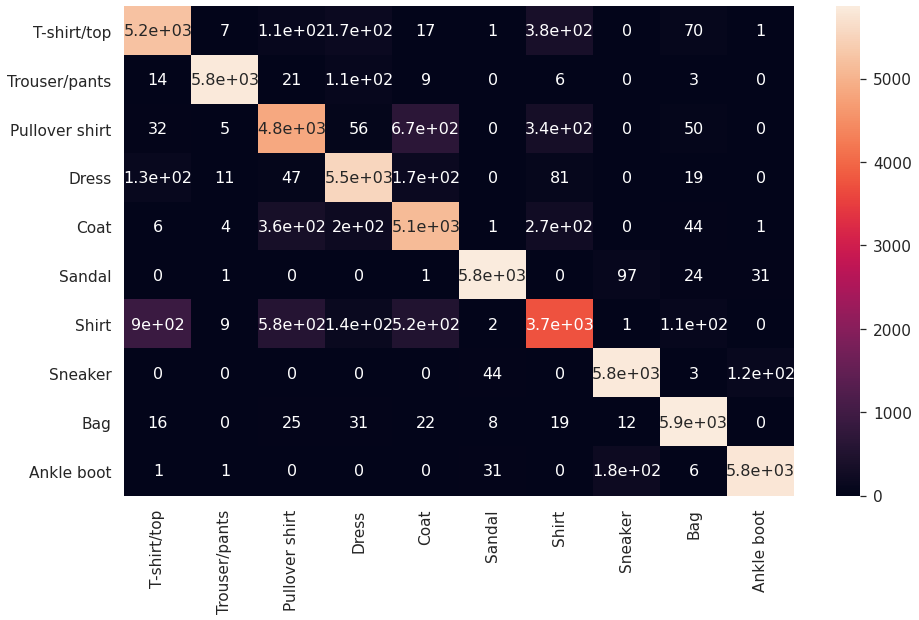

                precision    recall  f1-score   support

   T-shirt/top       0.83      0.87      0.85      6000
 Trouser/pants       0.99      0.97      0.98      6000
Pullover shirt       0.81      0.81      0.81      6000
         Dress       0.89      0.92      0.90      6000
          Coat       0.78      0.85      0.82      6000
        Sandal       0.99      0.97      0.98      6000
         Shirt       0.77      0.62      0.69      6000
       Sneaker       0.95      0.97      0.96      6000
           Bag       0.95      0.98      0.96      6000
    Ankle boot       0.97      0.96      0.97      6000

     micro avg       0.89      0.89      0.89     60000
     macro avg       0.89      0.89      0.89     60000
  weighted avg       0.89      0.89      0.89     60000
   samples avg       0.89      0.89      0.89     60000


Runtime of the algorithm is  1260.597  seconds
(4498.34160958926, 0.8476)


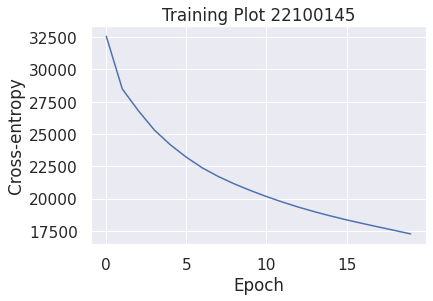

In [7]:
start = time.time()

# Instantiate the neural network with the number of nodes you choose per layer, right now it is done for three layers only.
nn = NeuralNetwork(nodes_per_layer=nodes_per_layer)
history = nn.fit(X_train, y_train, epochs=EPOCH, lr=LEARNING_RATE)
plt.plot(history);
plt.gca().set(xlabel='Epoch', ylabel='Cross-entropy', title='Training Plot {}'.format(rollnumber));
end = time.time()

print("Runtime of the algorithm is ", round((end - start),3)," seconds")

# print accuracy on test set here
# Copy Code Here
print(nn.evaluate(X_test,y_test))

#### <b>PART 2</b>

Now that your NN model has been replicated and trained, we move on to the actual part of this phase i.e. making your own dataset. The instruction for creating your own dataset are as follows:

- Each group has to create a dataset of 50 images (preferred way to go about this is that each member takes 10 pictures for the dataset)
- Make sure that all the classes/categories that are there in the Fashion MNIST dataset are covered in these 50 pictures. 
- Make sure that that there is no class imbalance in your dataset. Class imbalance is when one or more classes have more images/data than others
- Once done with taking the pictures, add them into folders where the name of the folder will be the label of that image (for reference, you can have a look at how phase 1's dataset was organized as you essentially have to replicate that directory tree with the only difference is that there will only be `test` folder as this dataset is only being used for evaluation purposes)
- Zip the dataset and upload it on your Google Drive. You will have to mount your drive and import your dataset in the same way as it was done in phase 1

Once done, you will be reading the your dataset in the notebook and storing it in variables (please make sure that you are not overwriting any variable from Part 1). This will be followed by preprocessing that you will have to do on the images an finally, you will be able to evalute your model 

<b>Note: It is important that you know the classes/categories, shape and other information regarding the Fashion MNIST dataset on which your model is trained because for your own dataset, you will have to generate the data/images such that they are inline with those same properties and classes otherwise your network will make a lot of misclassifications. You can read up on the Fashion MNIST dataset [here](https://www.kaggle.com/zalando-research/fashionmnist): to familiarize yourself with the dataset</b>

In [8]:
# Mounting Google Drive here
drive.mount('/drive', force_remount=True)

# Edit this address so that it points to the dataset's zipped file on your Google Drive
!unzip -o -q "/drive/MyDrive/Colab Notebooks/phase 3/group12_Dataset.zip" -d "/dataset/"

Mounted at /drive


In [32]:
classes = 10  # do not change this
my_X_test = []   # you must store the test images of your dataset in this varaible
x_test_2 = np.array([])
my_y_test = []   # you must store the test images' labels of your dataset in this varaible
markers_identifiers = []

###### Code Here ######
'''Please note that you will have to extarct and one-hot encode the labels of the images for my_y_test'''
for i in glob.glob('/dataset/group12_Dataset/**/*.png'):
  #print(i)
  img = cv2.imread(i,0)
  img_inv = (img/255.0)
  my_X_test.append(img_inv)
  fn = i.split('/')[3]
  if (fn == 'Anklefoot'):
    marker = [1,0,0,0,0,0,0,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'pullover'):
    marker = [0,0,0,0,0,1,0,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'coats'):
    marker = [0,0,1,0,0,0,0,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'dress'):
    marker = [0,0,0,1,0,0,0,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'bag'):
    marker = [0,1,0,0,0,0,0,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'sandal'):
    marker = [0,0,0,0,0,0,1,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'shirt'):
    marker = [0,0,0,0,0,0,0,1,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'trouser_pants'):
    marker = [0,0,0,0,1,0,0,0,0,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'sneaker'):
    marker = [0,0,0,0,0,0,0,0,1,0]
    markers_identifiers.append(np.array(marker))
  elif (fn == 'T-shirt'):
    marker = [0,0,0,0,0,0,0,0,0,1]
    markers_identifiers.append(np.array(marker))
  
my_y_test = np.array(markers_identifiers)
#my_X_test = np.array(my_X_test) # read from the data 

print("Number of images in the dataset: ", len(my_X_test))    # You can change len(X_test) based on your implementation such that total number of test samples is printed

Number of images in the dataset:  50


Now you have to do the preprocessing of the images such that they are inline with the image properties of the images of Fashion MNIST dataset. This is the core task of this phase and completely dependent on your own research on preprocessing of data

<b>HINT: Data Normalization is one of the ways the data is preprocessed</b>

In [33]:
'''Do data preprocessing here. Whatever you do here, please make sure that at the very end your images are in my_X_test and labels are in my_y_test'''
###### Code Here ######

for i in range(50):
  my_X_test[i]  = cv2.resize(my_X_test[i],dsize = (28,28),interpolation=cv2.INTER_AREA) ## converting the images to 28 by 28
  

for i in range(50):
  my_X_test[i] = (my_X_test[i].flatten()) #covnerting the shape from 50, 28,28 to 50,784
  # np.append(x_test_2,np.array(my_X_test[i].flatten().reshape(784,1)))


my_X_test = np.array(my_X_test)
#print(my_X_test[0]) # printing the shape of any 1 image to verify the shape
print(my_X_test.shape)
print(my_y_test.shape) #printing the shape of ytest which should be 50 by 10




(50, 784)
(50, 10)


In [41]:
# print accuracy on your own dataset here
print(nn.evaluate(my_X_test,my_y_test))

(406.2689954345502, 0.12)
